In [1]:
import pandas as pd
import geopandas as gpd
import numpy as np
import datetime
%matplotlib inline 

import matplotlib.pyplot as plt
from shapely.geometry import Point
from geopandas import GeoDataFrame
from shapely.geometry import MultiPolygon

In [2]:
evictions = pd.read_csv('Evictions.csv')

In [3]:
evictions.head()

,Court Index Number,Docket Number,Eviction Address,Eviction Apartment Number,Executed Date,Marshal First Name,Marshal Last Name,Residential/Commercial,BOROUGH,Eviction Postcode,Ejectment,Eviction/Legal Possession,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA
0,51214/18,154982,56-43 203RD STREET (APT.BASEMENT),NaN,06/28/2018,Ronald,Pazant,Residential,QUEENS,11364,Not an Ejectment,Possession,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,R52491/19,101670,533-539 BAY STREET,5D,03/02/2020,Ileana,Rivera,Residential,STATEN ISLAND,10304,Not an Ejectment,Possession,40.628870,-74.076516,1.0,49.0,21.0,5113073.0,5.004900e+09,Stapleton-Rosebank
2,054693/19,96311,51-24 BEACH CHANNEL DRIVE,2B,07/01/2019,Henry,Daley,Residential,QUEENS,11691,Not an Ejectment,Possession,40.595255,-73.782130,14.0,31.0,97203.0,4436440.0,4.160010e+09,Hammels-Arverne-Edgemere
3,698/19,99951,2751 BARNES AVE,3,11/26/2019,Henry,Daley,Residential,BRONX,10467,Not an Ejectment,Possession,40.866263,-73.863505,11.0,13.0,340.0,2053724.0,2.045120e+09,Bronxdale
4,69623/17,6987,500 W 134TH STREET,5A,12/13/2017,Robert,Renzulli,Residential,MANHATTAN,10031,Not an Ejectment,Possession,40.818283,-73.952856,9.0,7.0,219.0,1059742.0,1.019870e+09,Manhattanville


In [4]:
evictions.describe()

,Docket Number,Eviction Postcode,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL
count,66402.000000,66402.000000,60088.000000,60088.000000,60088.000000,60088.000000,60088.000000,5.997100e+04,5.997100e+04
mean,154596.373904,10792.352715,40.752980,-73.907309,8.008205,23.680585,8497.005575,2.698947e+06,2.622583e+09
std,148934.155878,519.078533,0.091077,0.067737,4.562565,13.662573,21663.030723,1.113010e+06,1.059270e+09
min,103.000000,0.000000,40.499050,-74.251262,1.000000,1.000000,1.000000,1.000000e+06,0.000000e+00
25%,60678.500000,10455.000000,40.672730,-73.943914,4.000000,13.000000,198.000000,2.010366e+06,2.028260e+09
50%,91350.500000,10472.000000,40.754493,-73.909411,8.000000,18.000000,379.000000,2.127481e+06,2.057030e+09
75%,291883.000000,11229.000000,40.836960,-73.870833,12.000000,36.000000,970.750000,3.337062e+06,3.071590e+09
max,496987.000000,12221.000000,40.911588,-73.701430,18.000000,51.000000,157903.000000,5.171959e+06,5.080490e+09


In [5]:
#1.
# Data is organized by court index number and Docket Number
# The rest of the data keeps track of when, where, and why someone was the eviction was added
# The data also tells whether or not a property was evicted or legally possessed

# The dataset consists of strings and floats
# All the columns listed by the .describe() function are recorded in floats
# The rest of the data is recorded in strings

# Regarding the meaning of the data, some columns such as Docket Number contain artibrary values
# Other columns such as BOROUGH contains values from a list of choices
# Other columns such as Ejectment contains values representing true or false (boolean)

In [6]:
#-------------------------------------------------------------------------------------

In [7]:
#Convert date to datetime object
evictions['Executed Date'] = pd.to_datetime(evictions['Executed Date'], format="%m/%d/%Y")

In [8]:
evictions.head()

,Court Index Number,Docket Number,Eviction Address,Eviction Apartment Number,Executed Date,Marshal First Name,Marshal Last Name,Residential/Commercial,BOROUGH,Eviction Postcode,Ejectment,Eviction/Legal Possession,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA
0,51214/18,154982,56-43 203RD STREET (APT.BASEMENT),NaN,2018-06-28,Ronald,Pazant,Residential,QUEENS,11364,Not an Ejectment,Possession,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,R52491/19,101670,533-539 BAY STREET,5D,2020-03-02,Ileana,Rivera,Residential,STATEN ISLAND,10304,Not an Ejectment,Possession,40.628870,-74.076516,1.0,49.0,21.0,5113073.0,5.004900e+09,Stapleton-Rosebank
2,054693/19,96311,51-24 BEACH CHANNEL DRIVE,2B,2019-07-01,Henry,Daley,Residential,QUEENS,11691,Not an Ejectment,Possession,40.595255,-73.782130,14.0,31.0,97203.0,4436440.0,4.160010e+09,Hammels-Arverne-Edgemere
3,698/19,99951,2751 BARNES AVE,3,2019-11-26,Henry,Daley,Residential,BRONX,10467,Not an Ejectment,Possession,40.866263,-73.863505,11.0,13.0,340.0,2053724.0,2.045120e+09,Bronxdale
4,69623/17,6987,500 W 134TH STREET,5A,2017-12-13,Robert,Renzulli,Residential,MANHATTAN,10031,Not an Ejectment,Possession,40.818283,-73.952856,9.0,7.0,219.0,1059742.0,1.019870e+09,Manhattanville


In [9]:
#Find unique years
unique_years = {}
for date in evictions['Executed Date']:
    if date.year not in unique_years:
        unique_years[date.year] = 0

print(unique_years)

#Error in data at year 2070
unique_years.pop(2070)
print(unique_years)

{2018: 0, 2020: 0, 2019: 0, 2017: 0, 2021: 0, 2070: 0}
{2018: 0, 2020: 0, 2019: 0, 2017: 0, 2021: 0}


In [10]:
#Count evictions by year
year_count = []
for i in range(len(unique_years)):
    year_count.append(0)

for date in evictions['Executed Date']:
    if date.year in unique_years:
        unique_years[date.year] += 1

print(unique_years)
    

{2018: 21830, 2020: 3387, 2019: 18647, 2017: 22530, 2021: 7}


In [11]:
#2. Eviction data was recorded from 2017-2021
# It seemms that the number  of evictions has greatly declined from 2017. 
# Each year, the number of evictions have gone down. Especially during the pandemic (2020+),
# evictions drastically fell from 20000+ to 3000+.

#2017 had the largest number of evictions at 22530
#2021 had the fewest number of evictions at 7. 
#However, this was not a full year of data, so the next lowest is 2020 at 3387 evictions.

# This pattern makes sense because of the consequences of COVID-19, which made it difficult to evict
# people since it would put them at risk of the virus. Alongside the other economic issues people
# are experiencing, it may be harder for a marshal to rule that a person needs to be evicted.

In [12]:
#-------------------------------------------------------------------------------------

In [13]:
#Finding ratio of commercial to residential evictions in the entire data
commercial_count = 0
residential_count = 0

commercial_sep = {2017:0, 2018:0, 2019:0, 2020:0, 2021:0, 2070:0}
residential_sep = {2017:0, 2018:0, 2019:0, 2020:0, 2021:0, 2070:0}

for i in range(len(evictions)):
    line  = evictions.iloc[i]
    
    if line['Residential/Commercial'] == "Residential":
        residential_count += 1
        residential_sep[line[4].year] += 1
    elif line['Residential/Commercial'] == "Commercial":
        commercial_count += 1
        commercial_sep[line[4].year] += 1
print(commercial_count / residential_count * 100)
print(commercial_sep, residential_sep)

9.197651663405088
{2017: 1720, 2018: 1842, 2019: 1672, 2020: 352, 2021: 7, 2070: 0} {2017: 20810, 2018: 19988, 2019: 16975, 2020: 3035, 2021: 0, 2070: 1}


In [14]:
#Finding separate ratios
print("2017", commercial_sep[2017] / residential_sep[2017] * 100)
print("2018", commercial_sep[2018] / residential_sep[2018] * 100)
print("2019", commercial_sep[2019] / residential_sep[2019] * 100)
print("2020", commercial_sep[2020] / residential_sep[2020] * 100)
#print("2021", commercial_sep[2021] / residential_sep[2021])
#Not enough data in 2021

2017 8.26525708793849
2018 9.215529317590555
2019 9.84977908689249
2020 11.598023064250413


Text(0.5, 1.0, 'Commercial to Residential Ratio by Year')

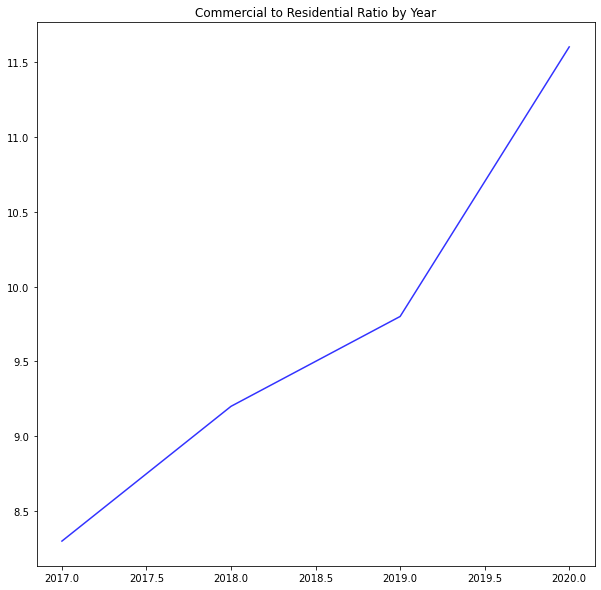

In [15]:
years = [2017, 2018, 2019, 2020]
percentage = [8.3, 9.2, 9.8, 11.6]

plt.figure(figsize=(10,10))
plt.plot(years, percentage, c='b',alpha=0.8)

plt.title('Commercial to Residential Ratio by Year')

In [16]:
#3. The overall ratio of commercial to residential evictions is 9.2%
# As the years progress, the ratio of commercial to residential evictions has risen dramatically
# This may be because many businesses have gone out of business because of COVID, so more storeowners and
# businessowners are getting evicted. 

In [17]:
#-------------------------------------------------------------------------------------

In [18]:
evictions['Full Name'] = evictions['Marshal First Name'] + " " + evictions['Marshal Last Name']

In [19]:
evictions.head()

,Court Index Number,Docket Number,Eviction Address,Eviction Apartment Number,Executed Date,Marshal First Name,Marshal Last Name,Residential/Commercial,BOROUGH,Eviction Postcode,...,Eviction/Legal Possession,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA,Full Name
0,51214/18,154982,56-43 203RD STREET (APT.BASEMENT),NaN,2018-06-28,Ronald,Pazant,Residential,QUEENS,11364,...,Possession,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ronald Pazant
1,R52491/19,101670,533-539 BAY STREET,5D,2020-03-02,Ileana,Rivera,Residential,STATEN ISLAND,10304,...,Possession,40.628870,-74.076516,1.0,49.0,21.0,5113073.0,5.004900e+09,Stapleton-Rosebank,Ileana Rivera
2,054693/19,96311,51-24 BEACH CHANNEL DRIVE,2B,2019-07-01,Henry,Daley,Residential,QUEENS,11691,...,Possession,40.595255,-73.782130,14.0,31.0,97203.0,4436440.0,4.160010e+09,Hammels-Arverne-Edgemere,Henry Daley
3,698/19,99951,2751 BARNES AVE,3,2019-11-26,Henry,Daley,Residential,BRONX,10467,...,Possession,40.866263,-73.863505,11.0,13.0,340.0,2053724.0,2.045120e+09,Bronxdale,Henry Daley
4,69623/17,6987,500 W 134TH STREET,5A,2017-12-13,Robert,Renzulli,Residential,MANHATTAN,10031,...,Possession,40.818283,-73.952856,9.0,7.0,219.0,1059742.0,1.019870e+09,Manhattanville,Robert Renzulli


In [20]:
# Merge first and last names into new column
marshal_names = evictions['Full Name'].unique()
marshal_dict = {}
for name in marshal_names:
    marshal_dict[name] = 0

In [21]:
# Count Marshal convictions
for name in evictions["Full Name"]:
    marshal_dict[name] += 1

marshal_names = []
    
for marshal, count in marshal_dict.items():
    marshal_names.append((count, marshal))

marshal_names.sort()
marshal_names

[(118, 'Robert Solimine'),
 (145, 'Jeffrey Rose'),
 (366, 'Bruce Kemp'),
 (388, 'Salavatore Giglio'),
 (394, 'Charles Marchisotto'),
 (446, 'Bernard Blake'),
 (551, 'Frank Siracusa'),
 (713, 'Howard Schain'),
 (757, 'Steven Powell'),
 (771, 'Kenneth Giachetta'),
 (804, 'Vadim Barbarovich'),
 (822, 'John Villanueva'),
 (1337, 'Ronald Pazant'),
 (1417, 'George Essock'),
 (1425, 'Alfred Locascio'),
 (1557, 'Gary Rose'),
 (1870, 'Maxine Chevlowe'),
 (1870, 'Richard Capuano'),
 (2403, 'Robert Renzulli'),
 (2661, 'George Essock, Jr.'),
 (3730, 'Darlene Barone'),
 (4023, 'Richard McCoy'),
 (5350, 'Danny Weinheim'),
 (5422, 'Edward Guida'),
 (5560, 'Thomas Bia'),
 (5842, 'Ileana Rivera'),
 (6487, 'Henry Daley'),
 (9173, 'Justin Grossman')]

In [22]:
#4. The marshals who had the most evictions were:
# 1. Justin Grossman - 110076
# 2. Henry Daley - 77844
# 3. Ileana Rivera - 70104
# 4. Thommas Bia - 66720
# 5. Edward Guida - 65064

In [23]:
#-------------------------------------------------------------------------------------

In [24]:
# Prepare for counting evictions by borough and by year
borough_evictions = {"BRONX":0, "QUEENS": 0, "MANHATTAN": 0, "STATEN ISLAND": 0, "BROOKLYN": 0}
bronx_evictions = {2017:0, 2018:0, 2019:0, 2020:0, 2021:0, 2070:0}
queens_evictions = {2017:0, 2018:0, 2019:0, 2020:0, 2021:0, 2070:0}
manhattan_evictions = {2017:0, 2018:0, 2019:0, 2020:0, 2021:0, 2070:0}
SI_evictions = {2017:0, 2018:0, 2019:0, 2020:0, 2021:0, 2070:0}
brooklyn_evictions = {2017:0, 2018:0, 2019:0, 2020:0, 2021:0, 2070:0}

borough_by_year = {"BRONX":bronx_evictions, "QUEENS": queens_evictions,
                   "MANHATTAN": manhattan_evictions, "STATEN ISLAND": SI_evictions,
                   "BROOKLYN": brooklyn_evictions}


In [25]:
# Count total evictions per borough as well as evictions for each year in each borough
for i in range(len(evictions)):
    line = evictions.iloc[i]
    
    borough_evictions[line[8]] += 1
    borough_by_year[line[8]][line[4].year] += 1
    
print(borough_evictions)
print("Bronx: ", bronx_evictions)
print("Queens: ", queens_evictions)
print("Manhattan: ", manhattan_evictions)
print("Staten Island: ", SI_evictions)
print("Brooklyn: ", brooklyn_evictions)

{'BRONX': 22053, 'QUEENS': 13177, 'MANHATTAN': 10167, 'STATEN ISLAND': 2173, 'BROOKLYN': 18832}
Bronx:  {2017: 7662, 2018: 7140, 2019: 6188, 2020: 1061, 2021: 1, 2070: 1}
Queens:  {2017: 4325, 2018: 4452, 2019: 3705, 2020: 693, 2021: 2, 2070: 0}
Manhattan:  {2017: 3452, 2018: 3390, 2019: 2806, 2020: 518, 2021: 1, 2070: 0}
Staten Island:  {2017: 734, 2018: 691, 2019: 636, 2020: 112, 2021: 0, 2070: 0}
Brooklyn:  {2017: 6357, 2018: 6157, 2019: 5312, 2020: 1003, 2021: 3, 2070: 0}


In [26]:
# Prepare for finding percentage between eviction and population
borough_names = ["BRONX", "QUEENS", "MANHATTAN", "STATEN ISLAND", "BROOKLYN"]
borough_pops = [1400000, 2300000, 8300000, 500000, 2600000]
borough_evictions_arr_2017 = [15324, 8650, 6904, 1468, 12714]
borough_evictions_arr_2020 = [2122, 1386, 1036, 224, 2006]

for i in range(len(borough_pops)):
    print(borough_names[i])
    print("2017:", borough_evictions_arr_2017[i] / borough_pops[i] * 100)
    print("2020: ", borough_evictions_arr_2020[i] / borough_pops[i] * 100)
    print("Difference: ", borough_evictions_arr_2017[i] / borough_pops[i] * 100\
          - borough_evictions_arr_2020[i] / borough_pops[i] * 100)
    print()

BRONX
2017: 1.0945714285714285
2020:  0.15157142857142858
Difference:  0.943

QUEENS
2017: 0.3760869565217391
2020:  0.06026086956521739
Difference:  0.31582608695652176

MANHATTAN
2017: 0.08318072289156626
2020:  0.012481927710843374
Difference:  0.07069879518072289

STATEN ISLAND
2017: 0.29359999999999997
2020:  0.0448
Difference:  0.24879999999999997

BROOKLYN
2017: 0.48900000000000005
2020:  0.07715384615384616
Difference:  0.41184615384615386



In [27]:
#5. 
# Bronx has the most evictions
# Staten Island has the fewest evictions

# All boroughs have had significant decreased in evictions over time from 2017-2021
# In the Bronx and SI, the number of evictions had been decreasing even without the pandemic from 2017-2018
# Evictions were becoming more common in Queens from 2017-2018
# In Manhattan and Brooklyn, the numbers remained mostly unchanged from 2017-2018

# It seems that the number of evictions in all boroughs except the Bronx were decreasing slowly before the pandemic
# Evictions in the Bronx seem to have been decreasing at the fastest rate pre-covid
# After covid, all the evictions in each borough followed a similar rate and plummeted.

# Compared to each borough's 2019 rough population count provided by the Census,
# Bronx- 1.4mil
# Queens- 2.3mil
# Manhattan- 8.3mil
# Staten Island- 500k
# Brooklyn- 2.6mil

# In 2017, the Bronx had the highest rate of evictions to its population while Manhattan had the lowest
# In 2020, the ranks of percentages did not change for all 5 boroughs

# However, it seems that the Bronx has lost the most number of evictions from 2017-2020, while the number of
# Evictions in Manhattan is mostly unchanged compared the population density.


In [28]:
#-------------------------------------------------------------------------------------

In [29]:
# Load 2021 NTA data
nta_ny = gpd.read_file('nynta_21a')
nta_ny.head()

,BoroCode,BoroName,CountyFIPS,NTACode,NTAName,Shape_Leng,Shape_Area,geometry
0,3,Brooklyn,047,BK88,Borough Park,39247.227831,5.400502e+07,"POLYGON ((990897.900 169268.121, 990588.252 16..."
1,4,Queens,081,QN51,Murray Hill,33266.904872,5.248828e+07,"POLYGON ((1038593.459 221913.355, 1039369.281 ..."
2,4,Queens,081,QN27,East Elmhurst,19816.712132,1.972685e+07,"POLYGON ((1022728.275 217530.808, 1023052.645 ..."
3,4,Queens,081,QN07,Hollis,20976.335781,2.288777e+07,"POLYGON ((1051539.660 201007.013, 1051920.726 ..."
4,3,Brooklyn,047,BK25,Homecrest,27514.022918,2.999197e+07,"POLYGON ((995746.857 161665.390, 995833.832 16..."


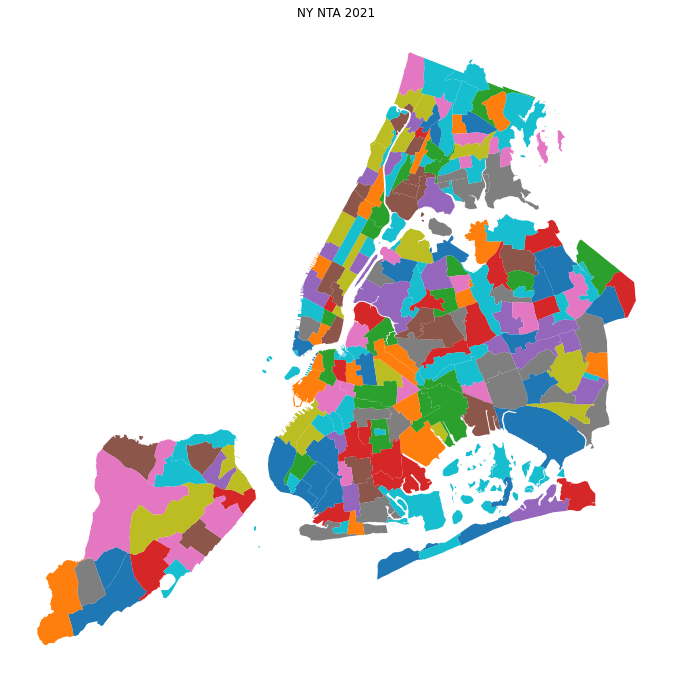

In [30]:
nta_ny.plot(column='NTAName',figsize=(12, 12),markersize=0.1)
plt.axis('off')
plt.title('NY NTA 2021')

plt.show()

In [31]:
# Count evictions per NTA
eviction_grouped = evictions.groupby(['NTA'], as_index = False).count()
eviction_grouped["NTAName"] = eviction_grouped["NTA"]
eviction_grouped.head()

,NTA,Court Index Number,Docket Number,Eviction Address,Eviction Apartment Number,Executed Date,Marshal First Name,Marshal Last Name,Residential/Commercial,BOROUGH,...,Eviction/Legal Possession,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,Full Name,NTAName
0,Allerton-Pelham Gardens,143,143,143,125,143,143,143,143,143,...,143,143,143,143,143,143,143,143,143,Allerton-Pelham Gardens
1,Annadale-Huguenot-Prince's Bay-Eltingville,17,17,17,8,17,17,17,17,17,...,17,17,17,17,17,17,17,17,17,Annadale-Huguenot-Prince's Bay-Eltingville
2,Arden Heights,25,25,25,11,25,25,25,25,25,...,25,25,25,25,25,25,25,25,25,Arden Heights
3,Astoria,313,313,313,244,313,313,313,313,313,...,313,313,313,313,313,313,311,311,313,Astoria
4,Auburndale,30,30,30,15,30,30,30,30,30,...,30,30,30,30,30,30,30,30,30,Auburndale


In [32]:
merged_evictions_nta = nta_ny.merge(eviction_grouped, on="NTAName")
merged_evictions_nta.head()

,BoroCode,BoroName,CountyFIPS,NTACode,NTAName,Shape_Leng,Shape_Area,geometry,NTA,Court Index Number,...,Ejectment,Eviction/Legal Possession,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,Full Name
0,3,Brooklyn,047,BK88,Borough Park,39247.227831,5.400502e+07,"POLYGON ((990897.900 169268.121, 990588.252 16...",Borough Park,181,...,181,181,181,181,181,181,181,181,181,181
1,4,Queens,081,QN51,Murray Hill,33266.904872,5.248828e+07,"POLYGON ((1038593.459 221913.355, 1039369.281 ...",Murray Hill,177,...,177,177,177,177,177,177,177,177,177,177
2,4,Queens,081,QN27,East Elmhurst,19816.712132,1.972685e+07,"POLYGON ((1022728.275 217530.808, 1023052.645 ...",East Elmhurst,96,...,96,96,96,96,96,96,96,96,96,96
3,4,Queens,081,QN07,Hollis,20976.335781,2.288777e+07,"POLYGON ((1051539.660 201007.013, 1051920.726 ...",Hollis,218,...,218,218,218,218,218,218,218,217,217,218
4,3,Brooklyn,047,BK25,Homecrest,27514.022918,2.999197e+07,"POLYGON ((995746.857 161665.390, 995833.832 16...",Homecrest,162,...,162,162,162,162,162,162,162,162,162,162


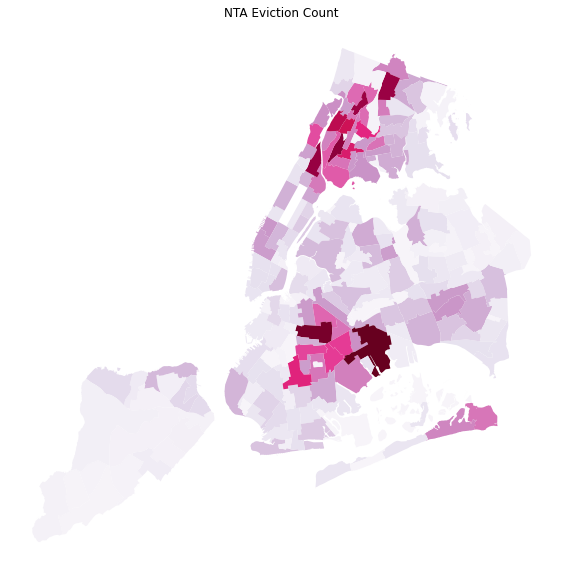

In [33]:
merged_evictions_nta.plot(column='BIN',figsize=(30, 10),cmap='PuRd')

plt.title('NTA Eviction Count')
plt.axis('off')
plt.show()

In [34]:
#6. 
# The highest count of evictions are located in the Bronx/Upper Manhattan, as well as Eastern Brooklyn
# This map matches with the previous analysis on the number of evictions for each borough, 
# showing that the majority of evictions occur in the Bronx and Brooklyn. 
# Now, the map shows where exactly many of the evictions are.
# Besides the Bronx, areas near Manhattan seem to have few evictions. 
# The Bronx has a large nummber of evictions. This may be caused by gentrification of the Bronx,
# causing many lower income residents to be forced out of their homes. In Brooklyn, the areas with
# few evictions seem to be the more gentrified and wealthier neighborhoods. 
# It may be that gentrification is pushing residents out from ungentrified neighborhoods.

In [35]:
#-------------------------------------------------------------------------------------

In [36]:
NDA = pd.read_csv('NDA.csv')
NDA.tail()

,PROGRAM TYPE,PROGRAM,SITE NAME,BOROUGH / COMMUNITY,AGENCY,Contact Number,Grade Level / Age Group,Location 1,Postcode,Latitude,Longitude,Community Board,Community Council,Census Tract,BIN,BBL,NTA
459,"Reading & Writing,NDA Programs,Family Literacy",Family Literacy,Edith and Carl Marks Jewish Community House of...,Brooklyn,Edith and Carl Marks Jewish Community House of...,718-943-6325,A parent 16 Years Old or Older,"7802 Bay Parkway\nBrooklyn, NEW YORK 11214\n(4...",11214.0,40.606369,-73.989235,11.0,44.0,270.0,3162352.0,3.062640e+09,Bensonhurst West ...
460,"Reading & Writing,NDA Programs,Family Literacy",Adolescent Literacy,JHS 22- Jordan L Mott School,Bronx,Supportive Childrens Advocacy Network (SCAN),212.683.2522,grades 6 to 8,"270 167th Street\nBronx, NEW YORK 10456\n(40.8...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
461,"Reading & Writing,NDA Programs,English Languag...",Adult Literacy,Washington Houses Community Center,Manhattan,Union Settlement Association,(212) 828-6298,16+,"1775 3rd Avenue\nManhattan, NEW YORK 10029\n(4...",10029.0,40.786574,-73.948303,11.0,8.0,15602.0,1079203.0,1.016470e+09,East Harlem South ...
462,"NDA Programs,Senior Programs,Older Adult Program",Seniors,Highbridge Gardens,Bronx,Children's Aid Society/East Harlem Center,(718) 542-0006,Seniors,"1145 University Avenue\nBronx, NEW YORK 10452\...",10452.0,40.837077,-73.928282,4.0,16.0,193.0,2095219.0,2.025270e+09,Highbridge ...
463,"Family Support,NDA Programs",Housing,Harlem Justice Center,New York,The Urban Assembly School for Law and Justice,(212) 473-8090,Adults,"170 121st Street\nNew York, NEW YORK 10035\n(4...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
# List of different types of services
NDA["PROGRAM"].unique()

array(['Adolescent Literacy', ' High-School Aged Youth', ' Housing',
       'Legal Services', 'Legal Assistance Program',
       'Fatherhood Initiative', 'Health Stat',
       'Domestic Violence Program', 'Seniors', 'Healthy Families',
       ' Adult Literacy', ' Middle School Youth',
       'Services - Immigrant Families', 'Immigrant/Refugee Assistance',
       'Health Stat Initiative', 'Housing', ' Immigrant',
       'NDA Immigrants', 'Family Literacy',
       'Legal Services - Immigrant Youth', 'NDA Immigrats'], dtype=object)

In [38]:
# Count NDA per NTA and clear whitespace
NDA_group = NDA.groupby(['NTA'], as_index = False).count()
NDA_group["NTAName"] = NDA_group["NTA"].str.strip()
NDA_group.head()

,NTA,PROGRAM TYPE,PROGRAM,SITE NAME,BOROUGH / COMMUNITY,AGENCY,Contact Number,Grade Level / Age Group,Location 1,Postcode,Latitude,Longitude,Community Board,Community Council,Census Tract,BIN,BBL,NTAName
0,Allerton-Pelham Gardens ...,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,Allerton-Pelham Gardens
1,Astoria ...,3,3,3,3,3,3,2,3,3,3,3,3,3,3,3,3,Astoria
2,Baisley Park ...,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,Baisley Park
3,Battery Park City-Lower Manhattan ...,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,Battery Park City-Lower Manhattan
4,Bedford ...,7,7,7,7,7,7,5,7,7,7,7,7,7,7,7,7,Bedford


In [39]:
# Merge NDA and NTA
nta_NDA_merged = nta_ny.merge(NDA_group, on="NTAName")
nta_NDA_merged.head()

,BoroCode,BoroName,CountyFIPS,NTACode,NTAName,Shape_Leng,Shape_Area,geometry,NTA,PROGRAM TYPE,...,Grade Level / Age Group,Location 1,Postcode,Latitude,Longitude,Community Board,Community Council,Census Tract,BIN,BBL
0,3,Brooklyn,047,BK88,Borough Park,39247.227831,5.400502e+07,"POLYGON ((990897.900 169268.121, 990588.252 16...",Borough Park ...,5,...,3,5,5,5,5,5,5,5,5,5
1,4,Queens,081,QN51,Murray Hill,33266.904872,5.248828e+07,"POLYGON ((1038593.459 221913.355, 1039369.281 ...",Murray Hill ...,1,...,1,1,1,1,1,1,1,1,1,1
2,3,Brooklyn,047,BK25,Homecrest,27514.022918,2.999197e+07,"POLYGON ((995746.857 161665.390, 995833.832 16...",Homecrest ...,2,...,2,2,2,2,2,2,2,2,2,2
3,4,Queens,081,QN08,St. Albans,45401.316980,7.741275e+07,"POLYGON ((1052996.114 196307.361, 1053081.596 ...",St. Albans ...,1,...,1,1,1,1,1,1,1,1,1,1
4,3,Brooklyn,047,BK44,Madison,26237.257858,2.737916e+07,"POLYGON ((1001593.410 160996.441, 1001382.708 ...",Madison ...,3,...,3,3,3,3,3,3,3,3,3,3


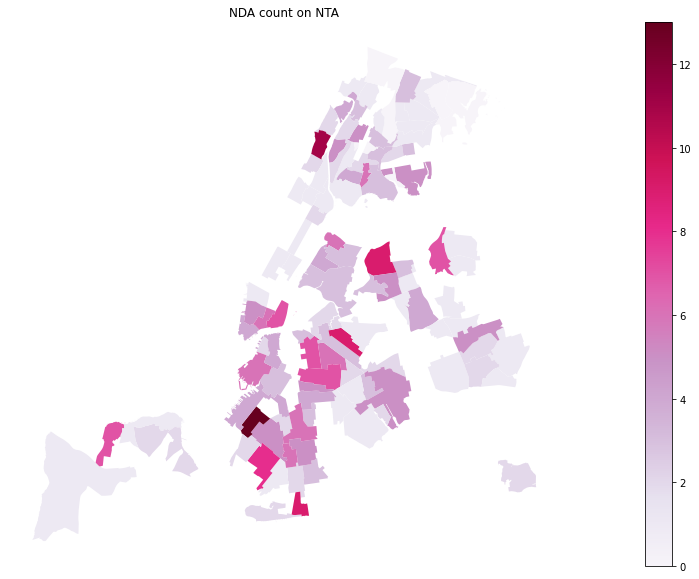

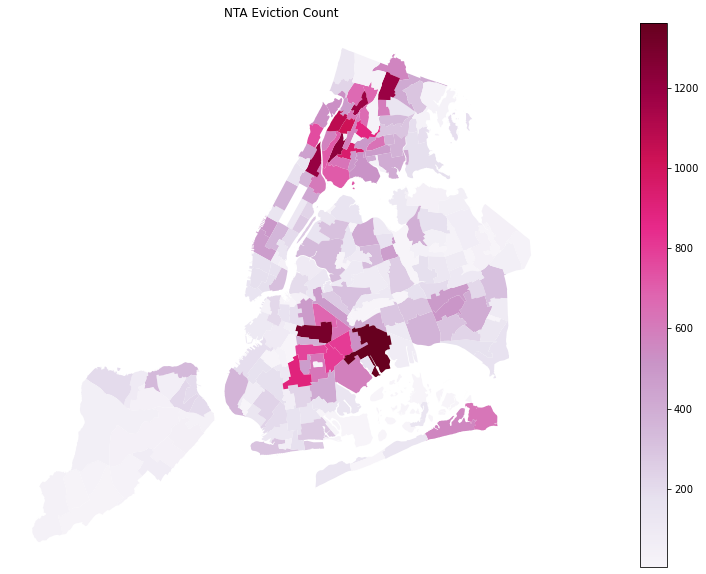

In [44]:
nta_NDA_merged.plot(column='BIN',figsize=(30, 10),cmap='PuRd', legend=True)

plt.title('NDA count on NTA')
plt.axis('off')
plt.show()

merged_evictions_nta.plot(column='BIN',figsize=(30, 10),cmap='PuRd', legend=True)

plt.title('NTA Eviction Count')
plt.axis('off')
plt.show()

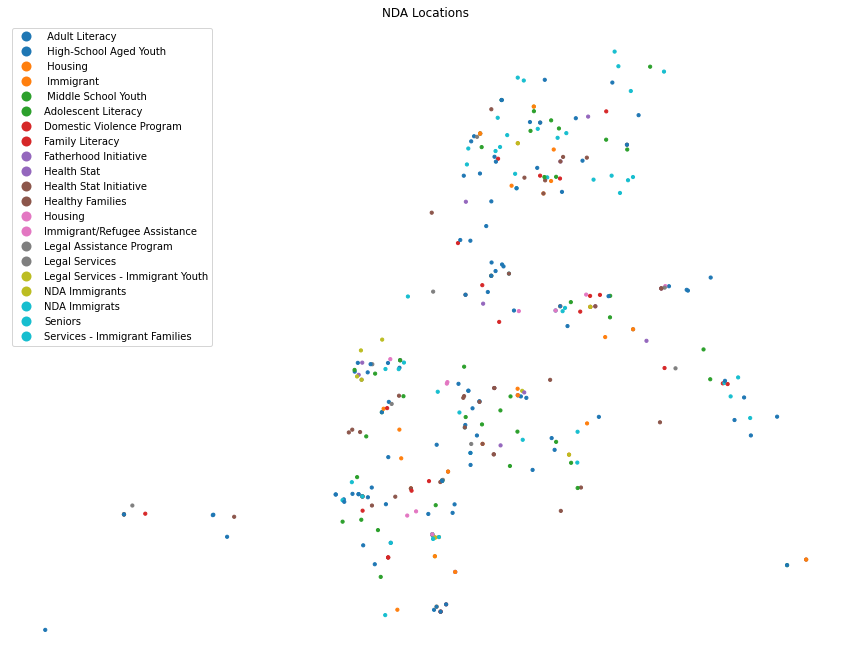

In [226]:
NDA_GDF = gpd.GeoDataFrame(
    NDA, geometry=gpd.points_from_xy(NDA.Longitude, NDA.Latitude))


NDA_GDF.plot(column="PROGRAM", figsize=(15, 15),legend=True,markersize=10)
plt.axis('off')
plt.title('NDA Locations')
plt.show()

In [ ]:
#7.
# Neighborhood development area (literacy services, housing, legal services, seniors, etc.)
# https://data.cityofnewyork.us/Education/DYCD-after-school-programs-Neighborhood-Developmen/chv4-k4fa/data
# Question: does the number of NDAs affect the number of evictions in a neighborhood?

# I chose this dataset because it contained all the location of services which helped families and immigrants
# with family and legal issues.

# I thought that it was possible that the presence of these centers could have some connection to where evictions
# occur in the city.

# These facilities may indicate the economic situation in the neighborhoods.

# Looking at the data, it appears that there is come connection between the locations of the NDA centers and
# where people are being evicted from. For example, in the Bronx and Brooklyn, the pattern of evicted NTAs 
# somewhat matches the pattern of NDA facilities.

# For other boroughs, the NDA locations and high eviction neighborhoods are less correlated.
# While there seem to be a few NDA centers in high eviction neighborhoods, many of NDA centers are more widely
# distributed across the city. 

# Looking at the types of NDA facilities in each area, NDA facilities seem to be evenly spread across all boroughs
# Except Manhattan and Staten Island. In Manhattan, many NDA facilities are  concentrated toward downtown, possibly
# indicating that more people need those services there.

# Although the number of NDA facilities do not seem to greatly affect the number of evictions in a NTA,
# it may be the quality of the facilities that causes a difference. Neighborhoods with more expensive and well
# funded NDAs may indicate that the neighborhood population is wealthier and less at risk of eviction. 

# However, the presence  of certain NDAs may indicate that the residents of the neighborhood needs more help.

# Overall, it seems that NDAs do have an impact on the number of evictions in a NTA, but the correlation is not
# simple. It depends on the type of NDA as well as its funding to determine whether or not it is an indicator
# of success or struggle.
